## HW4

### Problem 1 The nonlinear oscillations of the insect flight motor

In [106]:
import numpy as np
from numpy import sqrt, trace

from sympy import symbols, Eq, solve, Matrix, det
from sympy import I, re, im

import scipy as sp

from scipy.integrate import odeint
from scipy.optimize import fsolve
from scipy.linalg import eig

from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt

import cmath
# plt.ion()

In [30]:
# Define symbols
In, Γ, k, T, κ, r3, μ = symbols('In Γ k T κ r3 μ', real=True)

In [31]:
# Turn the system of equations into four first-order differential equations dxdt=g(x)
def system(x,t):
    φ, φ_dot, F, F_dot = x
    dxdt = [φ_dot,
           (F / T - Γ * np.abs(φ_dot) * φ_dot - k * φ / T**2) / In,
           F_dot,
           -r3 * (1 + κ) * F_dot - κ * r3**2 * F - μ * κ * r3**2 * φ_dot]
    return dxdt

In [32]:
# Determine the fixed point of this system
def find_fixed_points():
    eq1 = Eq(φ_dot, 0)
    eq2 = Eq((F / T - Γ * abs(φ_dot) * φ_dot - k * φ / T**2) / In, 0)
    eq3 = Eq(F_dot, 0)
    eq4 = Eq(-r3 * (1 + κ) * F_dot - κ * r3**2 * F - μ * κ * r3**2 * φ_dot, 0)

    fixed_points = solve([eq1, eq2, eq3, eq4], (φ, φ_dot, F, F_dot))

    return fixed_points

fixed_points = find_fixed_points()
print("fixed points:", fixed_points)

fixed points: [(0, 0, 0, 0)]


In [33]:
g_dynamics = Matrix([[φ_dot],
           [(F / T - Γ * np.abs(φ_dot) * φ_dot - k * φ / T**2) / In],
           [F_dot],
           [-r3 * (1 + κ) * F_dot - κ * r3**2 * F - μ * κ * r3**2 * φ_dot]])

g_J = g_dynamics.jacobian([φ, φ_dot, F, F_dot])

A = g_J.subs([(φ, 0), (φ_dot, 0), (F, 0), (F_dot,0)])

print(f'Jacobian Matrix A:\n{A}')

Jacobian Matrix A:
Matrix([[0, 1, 0, 0], [-k/(In*T**2), 0, 1/(In*T), 0], [0, 0, 0, 1], [0, -r3**2*κ*μ, -r3**2*κ, -r3*(κ + 1)]])


In [34]:
λ = symbols('λ')
char_eq = det(A - λ * Matrix.eye(4))
print("\nCharacteristic Equation:")
char_eq


Characteristic Equation:


(In*T**2*r3**2*κ*λ**2 + In*T**2*r3*κ*λ**3 + In*T**2*r3*λ**3 + In*T**2*λ**4 + T*r3**2*κ*λ*μ + k*r3**2*κ + k*r3*κ*λ + k*r3*λ + k*λ**2)/(In*T**2)

In [35]:
# Substitute λ = iω
char_eq_sub = char_eq.subs(λ, I * symbols('ω'))

char_eq_sub

(-In*T**2*r3**2*κ*ω**2 - I*In*T**2*r3*κ*ω**3 - I*In*T**2*r3*ω**3 + In*T**2*ω**4 + I*T*r3**2*κ*μ*ω + k*r3**2*κ + I*k*r3*κ*ω + I*k*r3*ω - k*ω**2)/(In*T**2)

In [36]:
# Real part of characteristic equation
char_eq_real = re(char_eq_sub)
char_eq_real

(-In*T**2*r3**2*κ*(re(ω)**2 - im(ω)**2) + In*T**2*r3*κ*(3*re(ω)**2*im(ω) - im(ω)**3) + In*T**2*r3*(3*re(ω)**2*im(ω) - im(ω)**3) + In*T**2*(re(ω)**4 - 6*re(ω)**2*im(ω)**2 + im(ω)**4) - T*r3**2*κ*μ*im(ω) + k*r3**2*κ - k*r3*κ*im(ω) - k*r3*im(ω) - k*(re(ω)**2 - im(ω)**2))/(In*T**2)

In [37]:
# Imaginary part of characteristic equation
char_eq_imag = im(char_eq_sub)
char_eq_imag

(-2*In*T**2*r3**2*κ*re(ω)*im(ω) - In*T**2*r3*κ*(re(ω)**3 - 3*re(ω)*im(ω)**2) - In*T**2*r3*(re(ω)**3 - 3*re(ω)*im(ω)**2) + In*T**2*(4*re(ω)**3*im(ω) - 4*re(ω)*im(ω)**3) + T*r3**2*κ*μ*re(ω) + k*r3*κ*re(ω) + k*r3*re(ω) - 2*k*re(ω)*im(ω))/(In*T**2)

In [38]:
print(char_eq_sub)

(-In*T**2*r3**2*κ*ω**2 - I*In*T**2*r3*κ*ω**3 - I*In*T**2*r3*ω**3 + In*T**2*ω**4 + I*T*r3**2*κ*μ*ω + k*r3**2*κ + I*k*r3*κ*ω + I*k*r3*ω - k*ω**2)/(In*T**2)


In [16]:
ω = symbols('ω')
char_eq_re = (-In*T**2*r3**2*κ*ω**2 + In*T**2*ω**4 + k*r3**2*κ - k*ω**2)/(In*T**2)

char_eq_im = (- In*T**2*r3*κ*ω**3 - In*T**2*r3*ω**3 + T*r3**2*κ*μ*ω + k*r3*κ*ω + k*r3*ω)/(In*T**2)

print("real part:")
print(char_eq_re)
print("\nimaginary part:")
print(char_eq_im)

real part:
(-In*T**2*r3**2*κ*ω**2 + In*T**2*ω**4 + k*r3**2*κ - k*ω**2)/(In*T**2)

imaginary part:
(-In*T**2*r3*κ*ω**3 - In*T**2*r3*ω**3 + T*r3**2*κ*μ*ω + k*r3*κ*ω + k*r3*ω)/(In*T**2)


In [17]:
char_eq_re

(-In*T**2*r3**2*κ*ω**2 + In*T**2*ω**4 + k*r3**2*κ - k*ω**2)/(In*T**2)

In [18]:
char_eq_im

(-In*T**2*r3*κ*ω**3 - In*T**2*r3*ω**3 + T*r3**2*κ*μ*ω + k*r3*κ*ω + k*r3*ω)/(In*T**2)

In [187]:
# Given equations
def char_eq_re(ω, T, κ, k, In_val, r3):
    return (-In_val * T**2 * r3**2 * κ * ω**2 + In_val * T**2 * ω**4 + k * r3**2 * κ - k * ω**2) / (In_val * T**2)

def char_eq_im(ω, T, κ, k, In_val, r3):
    return (-In_val * T**2 * r3 * κ * ω**3 - In_val * T**2 * r3 * ω**3 + T * r3**2 * κ * μ * ω + k * r3 * κ * ω + k * r3 * ω) / (In_val * T**2)


In [218]:
# Set up parameter space
μ_values = np.linspace(0.01, 2, 100)
r3_values = np.linspace(0.01, 1, 100)

# Set values
ω=1.0
T=1.0
κ=0.5
k=1.0
In=1.0

In [219]:
# Initialize arrays to store real and imaginary parts
re_values = np.zeros((len(μ_values), len(r3_values)))
im_values = np.zeros((len(μ_values), len(r3_values)))

# Calculate values for each combination of μ and r3
for i, μ in enumerate(μ_values):
    for j, r3 in enumerate(r3_values):
        re_values[i, j] = char_eq_re(ω, T, κ, k, In, r3)
        im_values[i, j] = char_eq_im(ω, T, κ, k, In, r3)

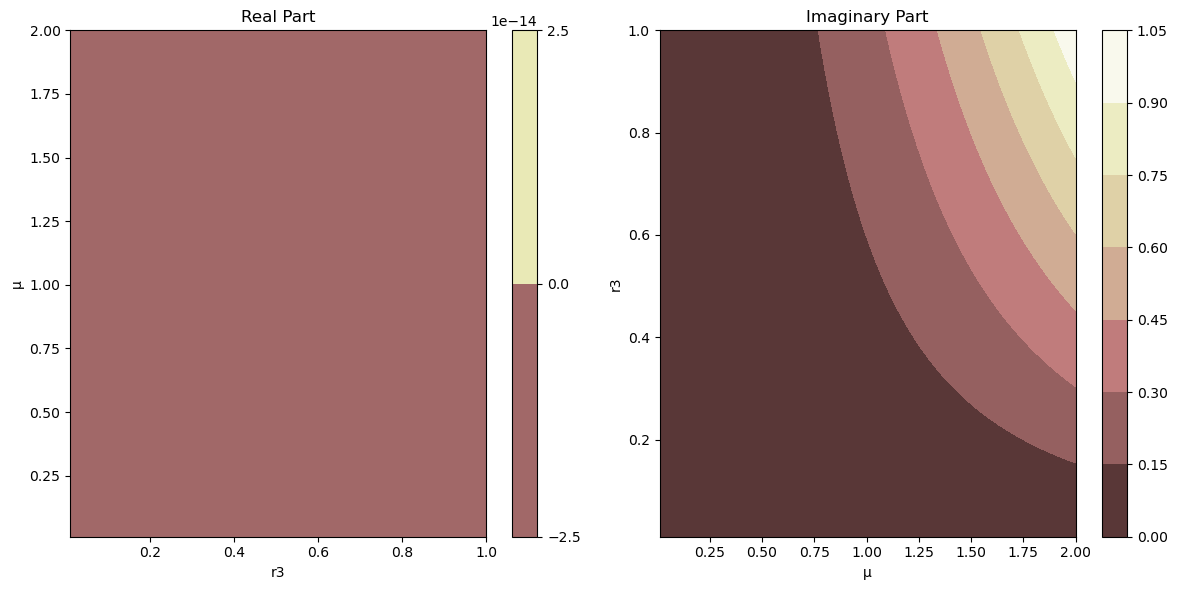

In [220]:
plt.figure(figsize=(12, 6))

# Plot real part
plt.subplot(1, 2, 1)
plt.contourf(r3_values, μ_values, re_values, cmap='pink')
plt.colorbar()
plt.ylabel('μ')
plt.xlabel('r3')
plt.title('Real Part')

# Plot imaginary part
plt.subplot(1, 2, 2)
plt.contourf(μ_values, r3_values, im_values, cmap='pink')
plt.colorbar()
plt.xlabel('μ')
plt.ylabel('r3')
plt.title('Imaginary Part')

plt.tight_layout()
plt.show()

In [213]:
# Initialize array for color coding
colors = np.zeros((len(μ_values), len(r3_values)))

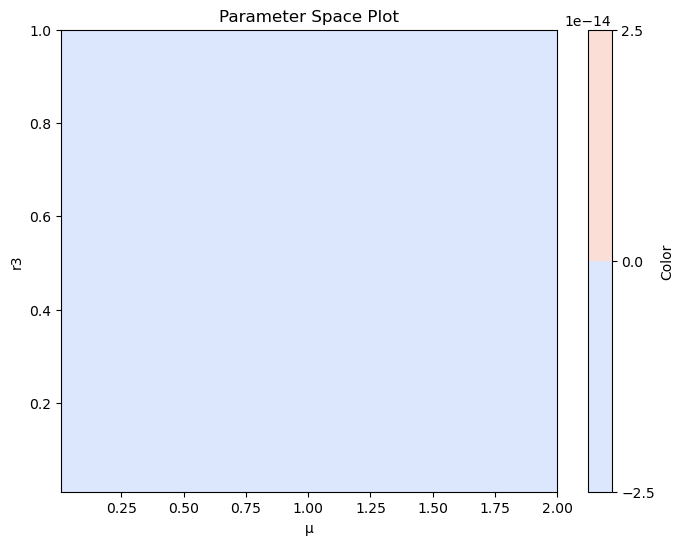

In [214]:
# Calculate values for each combination of μ and r3
for i, μ_val in enumerate(μ_values):
    for j, r3_val in enumerate(r3_values):
        re_values[i, j] = char_eq_re(ω, T, κ, k, In, r3_val)
        im_values[i, j] = char_eq_im(ω, T, κ, k, In, r3_val)

# Color coding based on the sign of the real parts
colors = np.where(re_values > 0, 1, 0)  # 1 for red, 0 for blue

# Plot the parameter space with color coding
plt.figure(figsize=(8, 6))
plt.contourf(μ_values, r3_values, colors, cmap='coolwarm', alpha=0.3)

# Label the axes and add a colorbar
plt.xlabel('μ')
plt.ylabel('r3')
plt.title('Parameter Space Plot')
plt.colorbar(label='Color')

# Show the plot
plt.show()

## Problem 2

In [96]:
def dynamics_fun(t, state, mu, omega, eps):
    x1, x2 = state
    dydt = [eps*(mu - (x1**2 + x2**2))*x1 + omega*x2, 
            eps*(mu - (x1**2 + x2**2))*x2 - omega*x1, ]
    return dydt

In [97]:
mu = 1
omega = 10
eps =  .1
t_end = 300

# Solve for dynamics
x_0 = 20*np.random.rand(1)[0]
v_0 = 20*np.random.rand(1)[0]
sol = solve_ivp(lambda t, y: dynamics_fun(t, y, mu, omega, eps), 
                [0,t_end], [x_0, v_0],  
                events = Poincare_event2,
                rtol=1e-8, atol = 1e-8)

C:\Users\78469\AppData\Local\Temp\ipykernel_21604\3755535222.py:11: RuntimeWarning: divide by zero encountered in divide
  plt.plot(tt, np.sqrt(mu / (1 - np.exp(-4*np.pi*mu*eps/omega)*(1 - mu/tt**2))), label='P')


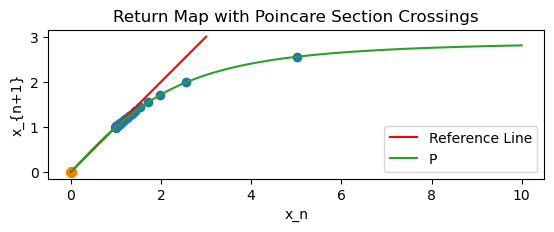

In [98]:
p_events_all = []
for kk in range(20):
    P_events = sol.y_events[0]
    
    p_events_all.append(P_events)
    
plt.plot(P_events[:-2], P_events[1:-1],'o')
plt.plot([0, 3], [0, 3], 'r-', label='Reference Line')

tt = np.linspace(0,10,100)
plt.plot(tt, np.sqrt(mu / (1 - np.exp(-4*np.pi*mu*eps/omega)*(1 - mu/tt**2))), label='P')

plt.gca().set_aspect('equal', 'box')
plt.xlabel('x_n')
plt.ylabel('x_{n+1}')
plt.title('Return Map with Poincare Section Crossings')

plt.legend()


## Problem 3

In [101]:
# Define symbols
x1, v1, x2, v2, a, b, c, tau, T = symbols('x1 v1 x2 v2 a b c tau T', positive=True, real=True)

# Define the system of equations
eq1 = Eq(1/tau * (c - a * np.maximum(0, x2) - b * v1) - x1, 0)   
eq2 = Eq(1/T * (np.maximum(0, x1) - v1), 0)
eq3 = Eq(1/tau * (c - a * np.maximum(0, x1) - b * v2) - x2, 0)
eq4 = Eq(1/T * (np.maximum(0, x2) - v2), 0)

# Solve for the fixed points
fixed_points = solve((eq1, eq2, eq3, eq4), (x1, v1, x2, v2))
print("Fixed Points:", fixed_points)

Fixed Points: {v1: c/(a + b + tau), v2: c/(a + b + tau), x1: c/(a + b + tau), x2: c/(a + b + tau)}


In [102]:
g_dynamics = Matrix([[1/tau * (c - a * np.maximum(0, x2) - b * v1) - x1], 
                    [1/T * (np.maximum(0, x1) - v1)],
                    [1/tau * (c - a * np.maximum(0, x1) - b * v2) - x2],
                    [1/T * (np.maximum(0, x2) - v2)]])
g_J = g_dynamics.jacobian([x1, v1, x2, v2])
A = g_J.subs([(x1, c/(a + b + tau)), (v1, c/(a + b + tau)), (x2, c/(a + b + tau)), (v2, c/(a + b + tau))])
A

Matrix([
[    -1, -b/tau, -a/tau,      0],
[   1/T,   -1/T,      0,      0],
[-a/tau,      0,     -1, -b/tau],
[     0,      0,    1/T,   -1/T]])

In [104]:
A.eigenvals()

{(T*a - T*tau - tau - sqrt(T**2*a**2 - 2*T**2*a*tau + T**2*tau**2 + 2*T*a*tau - 4*T*b*tau - 2*T*tau**2 + tau**2))/(2*T*tau): 1,
 (T*a - T*tau - tau + sqrt(T**2*a**2 - 2*T**2*a*tau + T**2*tau**2 + 2*T*a*tau - 4*T*b*tau - 2*T*tau**2 + tau**2))/(2*T*tau): 1,
 (-T*a - T*tau - tau - sqrt(T**2*a**2 + 2*T**2*a*tau + T**2*tau**2 - 2*T*a*tau - 4*T*b*tau - 2*T*tau**2 + tau**2))/(2*T*tau): 1,
 (-T*a - T*tau - tau + sqrt(T**2*a**2 + 2*T**2*a*tau + T**2*tau**2 - 2*T*a*tau - 4*T*b*tau - 2*T*tau**2 + tau**2))/(2*T*tau): 1}

In [108]:
# def check_stability(trace, det):
#     if trace <= 0 and det > 0:
#         return "Stable"
#     else:
#         return "Unstable"
# print(trace(A), det(A))
# print("Stability A:", check_stability(trace(A), det(A)))

print(trace(A), det(A))

-2 - 2/T (-a**2 + b**2 + 2*b*tau + tau**2)/(T**2*tau**2)


In [149]:
# Define the Matsuoka oscillator system
def matsuoka_oscillator(t, y, a, b, c, tau, T):
    x1, v1, x2, v2 = y
    dydt = [
        1/tau * (c - a * np.maximum(0,x2) - b * v1) - x1,
        1/T * (np.maximum(0,x1) - v1),
        1/tau * (c - a * np.maximum(0,x1) - b * v2) - x2,
        1/T * (np.maximum(0,x2) - v2)
    ]
    return dydt

In [168]:
# Set parameter values (stable)
a = 2.5
b = 2.5
c = 1.5
tau = 0.25
T = 0.5

Text(0.5, 1.0, 'Matsuoka Oscillator Simulation')

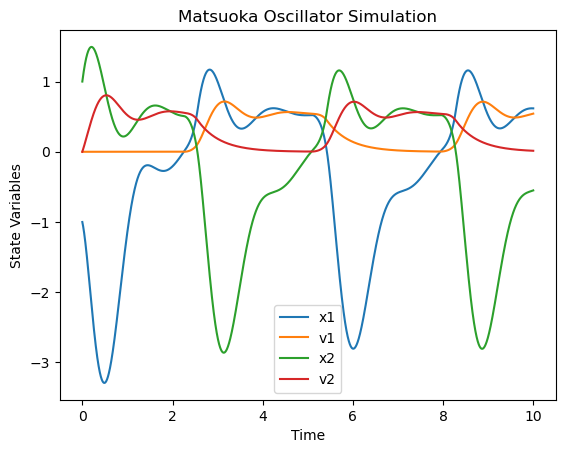

In [173]:
# Set initial conditions
initial_conditions = [-1, 0, 1, 0]

# Set time points for simulation
dt = 0.001
time = np.linspace(0,10,int(10/dt))

# Simulate the system
sol = solve_ivp(lambda t, y: matsuoka_oscillator(t, y, a, b, c, tau, T), 
                    [0, 10], initial_conditions, 
                    t_eval=time,
                    rtol=1e-8, atol=1e-8)

plt.figure(1)
plt.plot(sol.t, sol.y[0], label='x1')
plt.plot(sol.t, sol.y[1], label='v1')
plt.plot(sol.t, sol.y[2], label='x2')
plt.plot(sol.t, sol.y[3], label='v2')
plt.legend()
plt.xlabel('Time')
plt.ylabel('State Variables')
plt.title('Matsuoka Oscillator Simulation')

Text(0.5, 1.0, 'Matsuoka Oscillator Simulation')

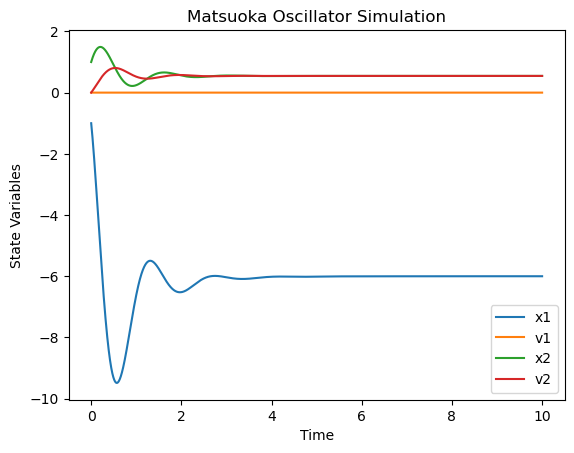

In [174]:
# Set parameter values (unstable)
a1 = 5.5
b = 2.5
c = 1.5
tau = 0.25
T = 0.5

# Simulate the system
sol = solve_ivp(lambda t, y: matsuoka_oscillator(t, y, a1, b, c, tau, T), 
                    [0, 10], initial_conditions, 
                    t_eval=time,
                    rtol=1e-8, atol=1e-8)

plt.figure(1)
plt.plot(sol.t, sol.y[0], label='x1')
plt.plot(sol.t, sol.y[1], label='v1')
plt.plot(sol.t, sol.y[2], label='x2')
plt.plot(sol.t, sol.y[3], label='v2')
plt.legend()
plt.xlabel('Time')
plt.ylabel('State Variables')
plt.title('Matsuoka Oscillator Simulation')